<img src="images/tree.png" alt="drawing" width="1000"/>

# **Decision Trees**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Culmen = penguin bill

In [2]:
penguins = pd.read_csv("data/penguins_size.csv")
display(penguins.head())

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Feature Engineering

In [3]:
print('')
print('Unique Species:')
print('---------------')
for s in list(penguins['species'].unique()): print(s) 

print('\n')

print('Unique Islands:')
print('---------------')
for s in list(penguins['island'].unique()): print(s) 

print('\n')

print('Unique Sex:')
print('---------------')
for s in list(penguins['sex'].unique()): print(s) 


Unique Species:
---------------
Adelie
Chinstrap
Gentoo


Unique Islands:
---------------
Torgersen
Biscoe
Dream


Unique Sex:
---------------
MALE
FEMALE
nan
.


In [4]:
penguins[penguins['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [5]:
penguins[penguins['species']=='Gentoo'].groupby('sex').describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

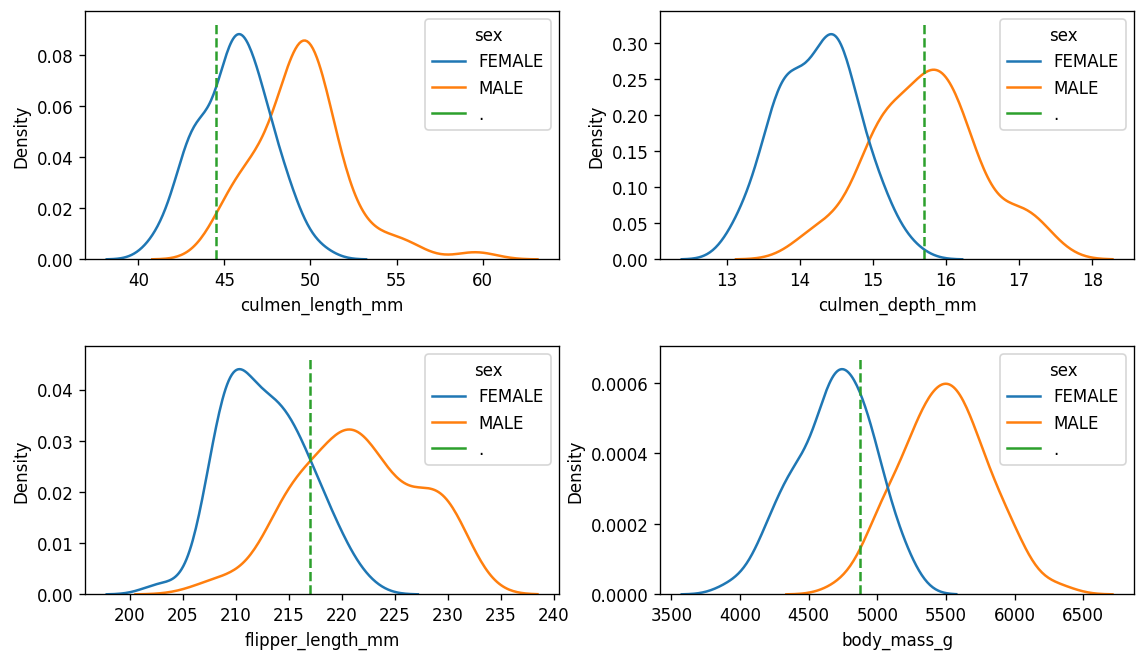

In [6]:
def plot_dist(feature, ax):
    sns.kdeplot(data=penguins[penguins['species']=='Gentoo'], x=feature, hue='sex', warn_singular=False, ax=ax)
    ymin, ymax = ax.get_ylim()
    ax.vlines(x=penguins[penguins['sex']=='.'][feature], ymin=ymin, ymax=ymax, linestyles='--', color='tab:green')
    
fig, ax = plt.subplots(2,2, figsize=(10,6), dpi=120)
fig.tight_layout(pad=3)

plot_dist(feature='culmen_length_mm', ax = ax[0][0])
plot_dist(feature='culmen_depth_mm', ax = ax[0][1])
plot_dist(feature='flipper_length_mm', ax = ax[1][0])
plot_dist(feature='body_mass_g', ax = ax[1][1])

plt.show()

In [7]:
penguins[penguins['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [8]:
penguins.at[336, 'sex'] = 'FEMALE'
penguins.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

In [9]:
penguins = penguins.dropna()

## Data Exploration

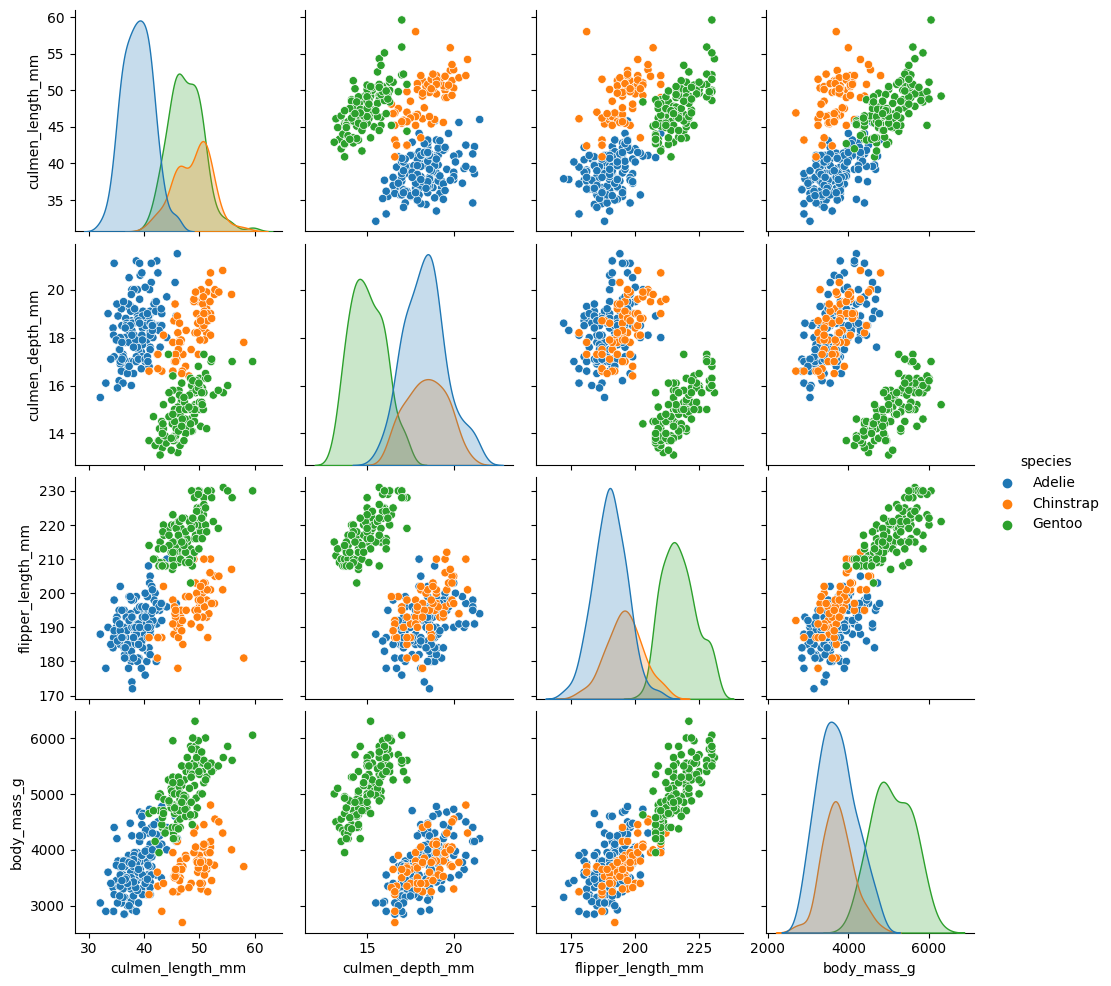

In [10]:
sns.pairplot(penguins, hue='species')

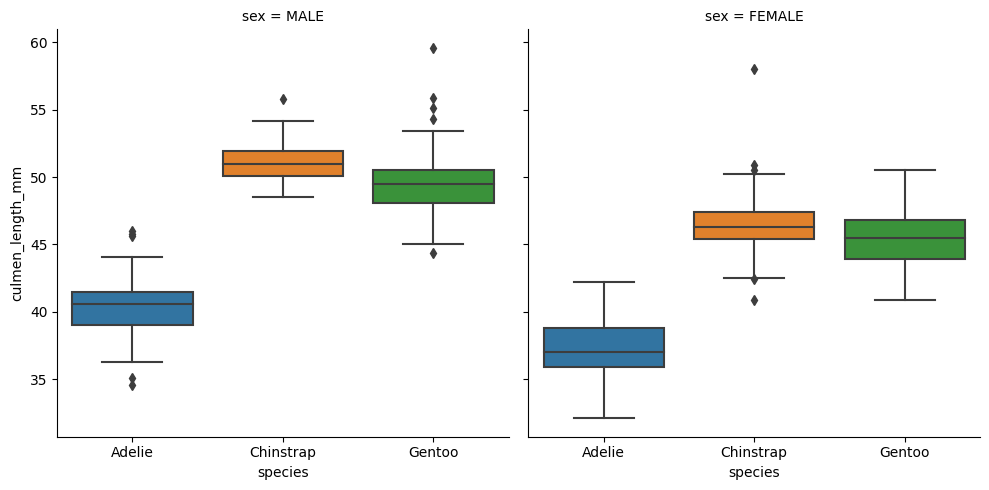

In [11]:
sns.catplot(data=penguins, x='species', y='culmen_length_mm', kind='box', col='sex')

## Decision Tree

Scikit Learn does not currently support multicategorical string features. Instead dummy variables need to be created for these multicategorical string features such as the *island* feature.

When creating the dummy variables where there are 2 or 3 possible values (sex = male/female, island = Torgersen/Biscoe/Dream) we can drop the first column of the dummy variable. If the sex = male we know it is not female, if the island is not Dream or Torgersen, then it must be Bisco

In [12]:
X = penguins.drop('species', axis='columns')
X = pd.get_dummies(X, drop_first=True)
y = penguins['species']

When preparing the data for the decision tree algorithm we do not need to scale the data as none of the features need to be compared numerically. 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred = model.predict(X_test)


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.91      0.95      0.93        41
   Chinstrap       0.90      0.83      0.86        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.94      0.94      0.94       101



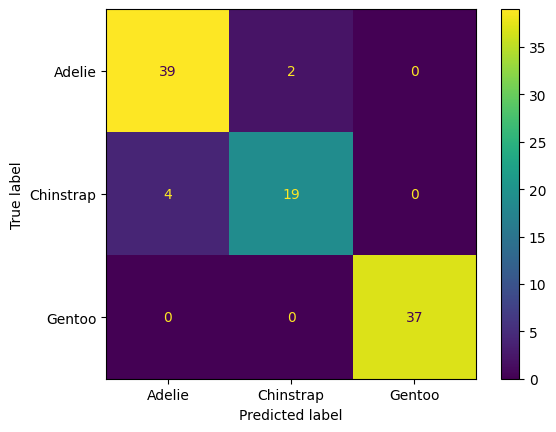

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [18]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

,Feature Importance
flipper_length_mm,0.531201
culmen_length_mm,0.323520
island_Dream,0.068185
culmen_depth_mm,0.052214
body_mass_g,0.013251
sex_MALE,0.011628
island_Torgersen,0.000000


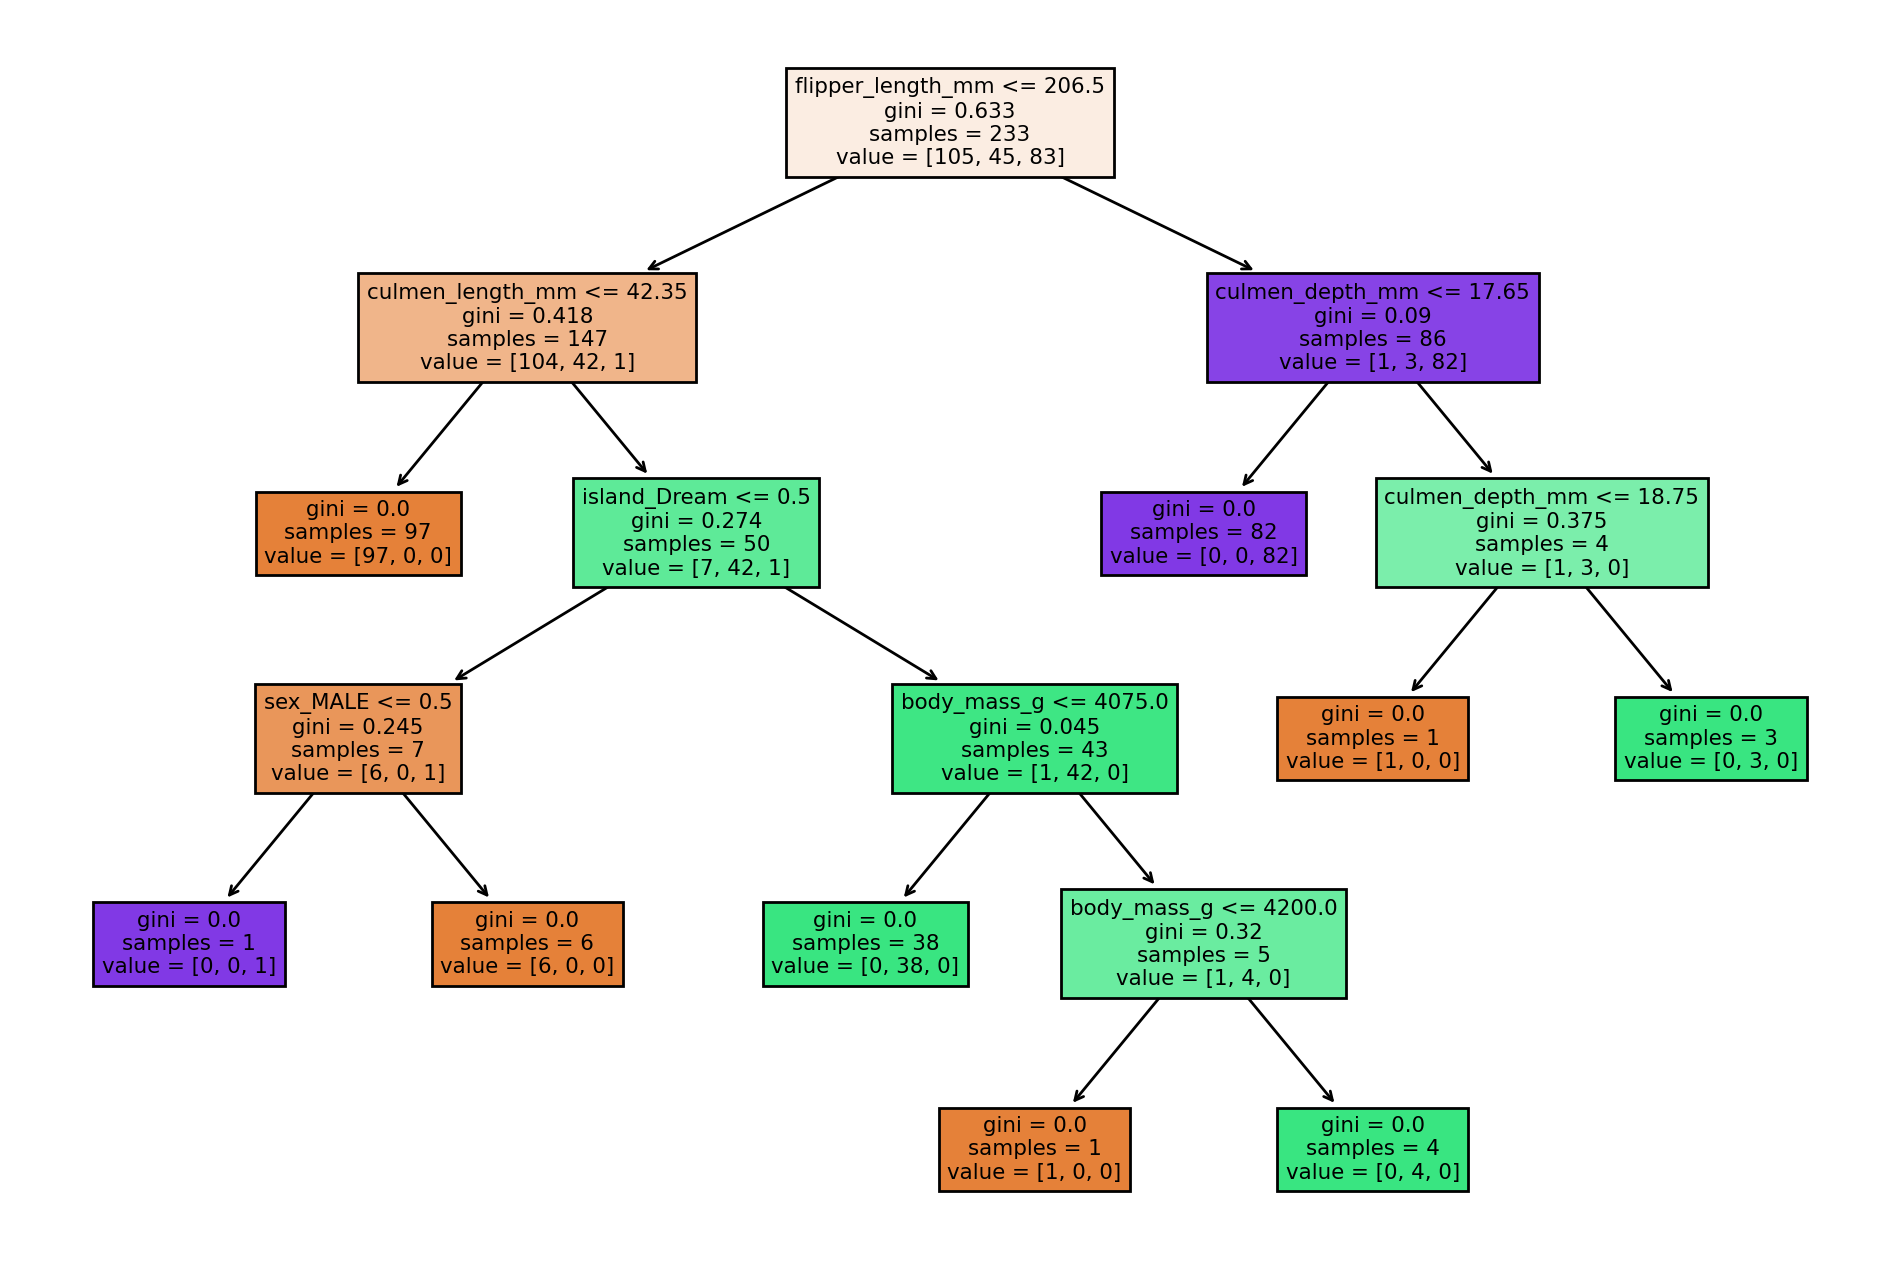

In [19]:
plt.figure(figsize=(12, 8), dpi=200)
plot_tree(model, feature_names=X.columns, filled=True);


### Hyperparameters

In [20]:
def report_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('\n')
    plt.figure(figsize=(12, 8), dpi=200)
    plot_tree(model, feature_names=X.columns, filled=True);

              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.95        41
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.96       101
   macro avg       0.96      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101





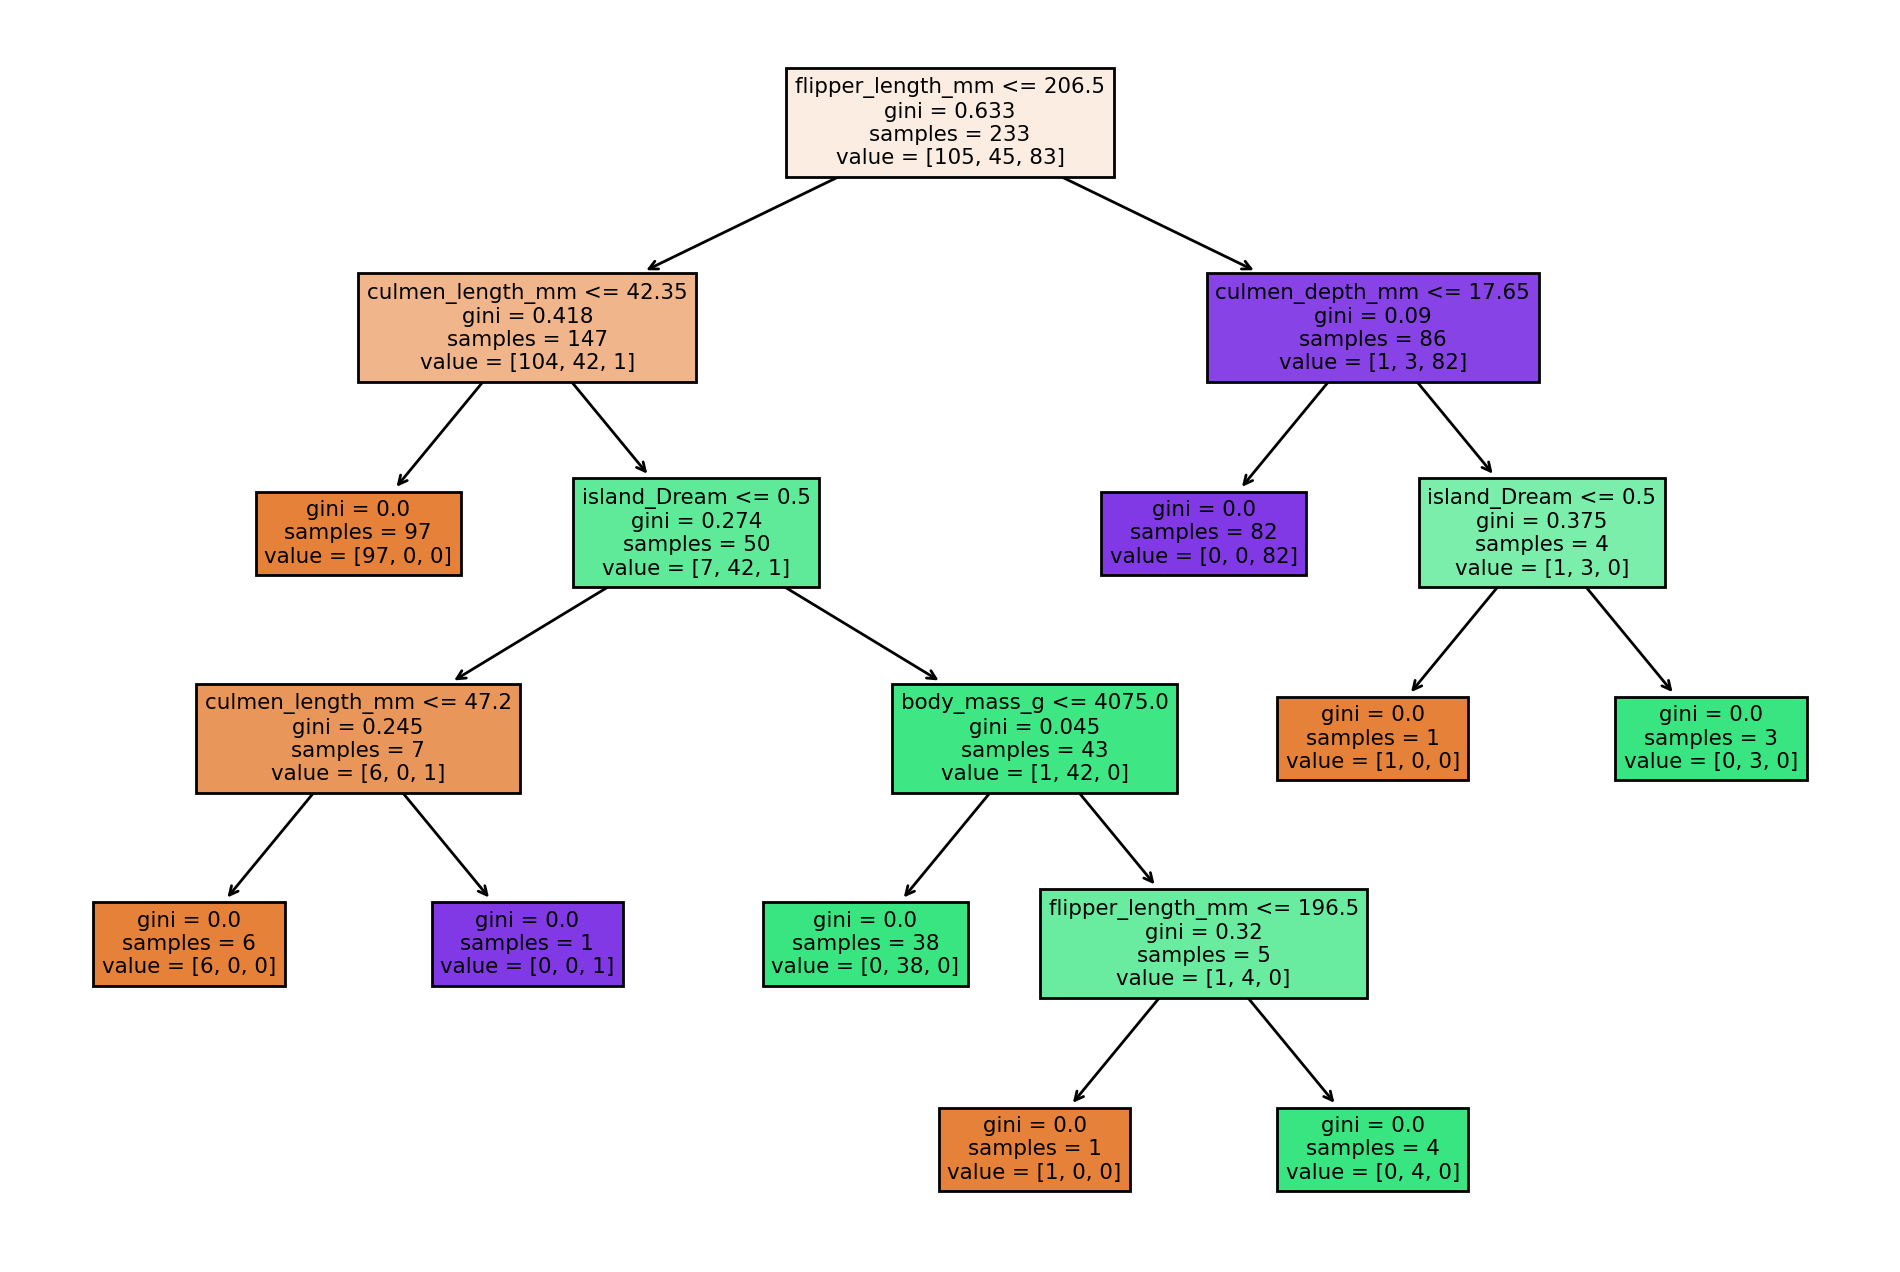

In [21]:
report_model(model)

#### Max Depth

The standard model has a depth of 5, setting the <code>max_depth</code> attribute allows us to set a maximum depth of the tree

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





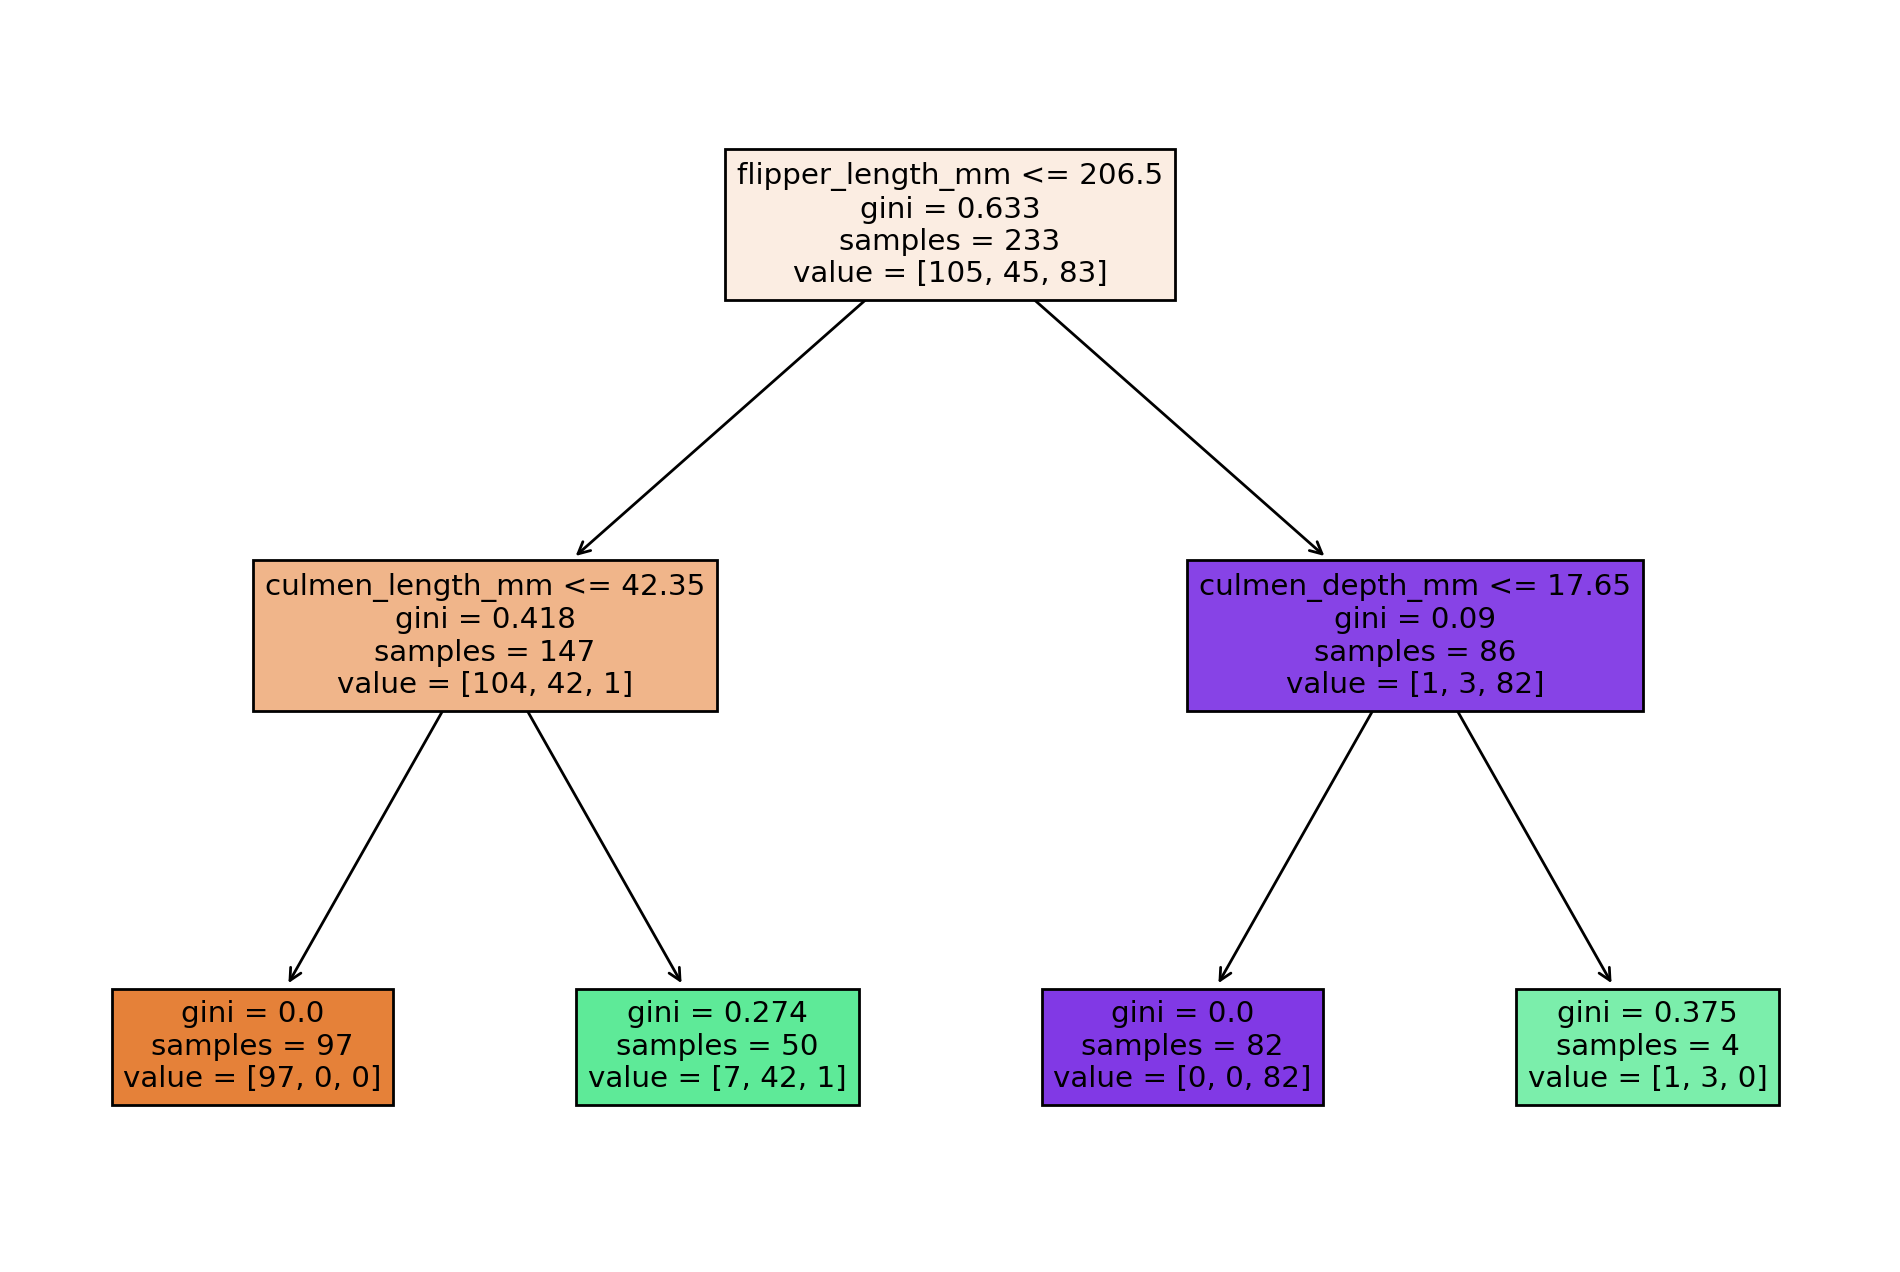

In [22]:
model_pruned_tree = DecisionTreeClassifier(max_depth=2)
report_model(model_pruned_tree)

#### Max Leaf Nodes

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





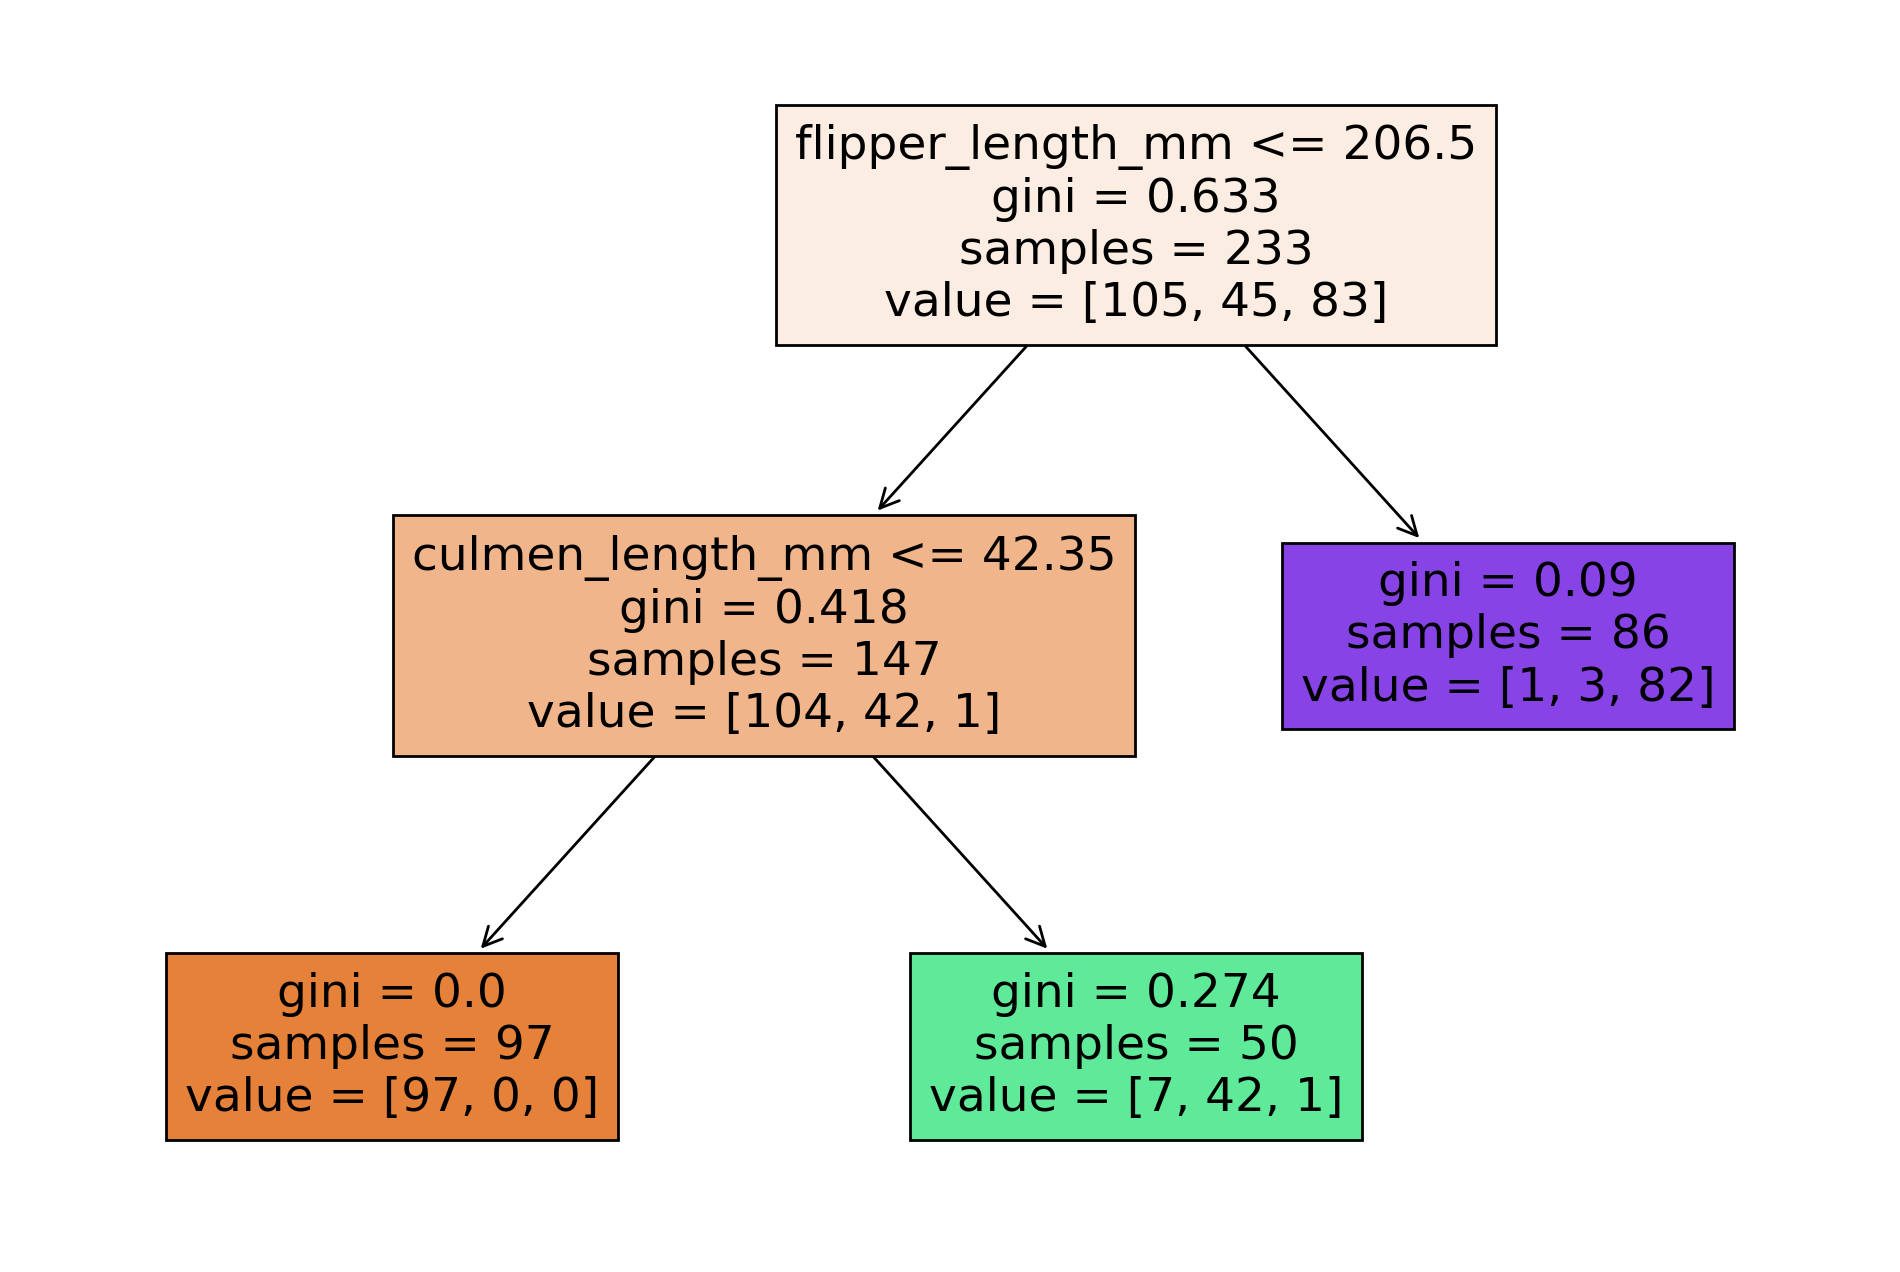

In [23]:
model_max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)
report_model(model_max_leaf_tree)

#### Criterion - Entropy

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101





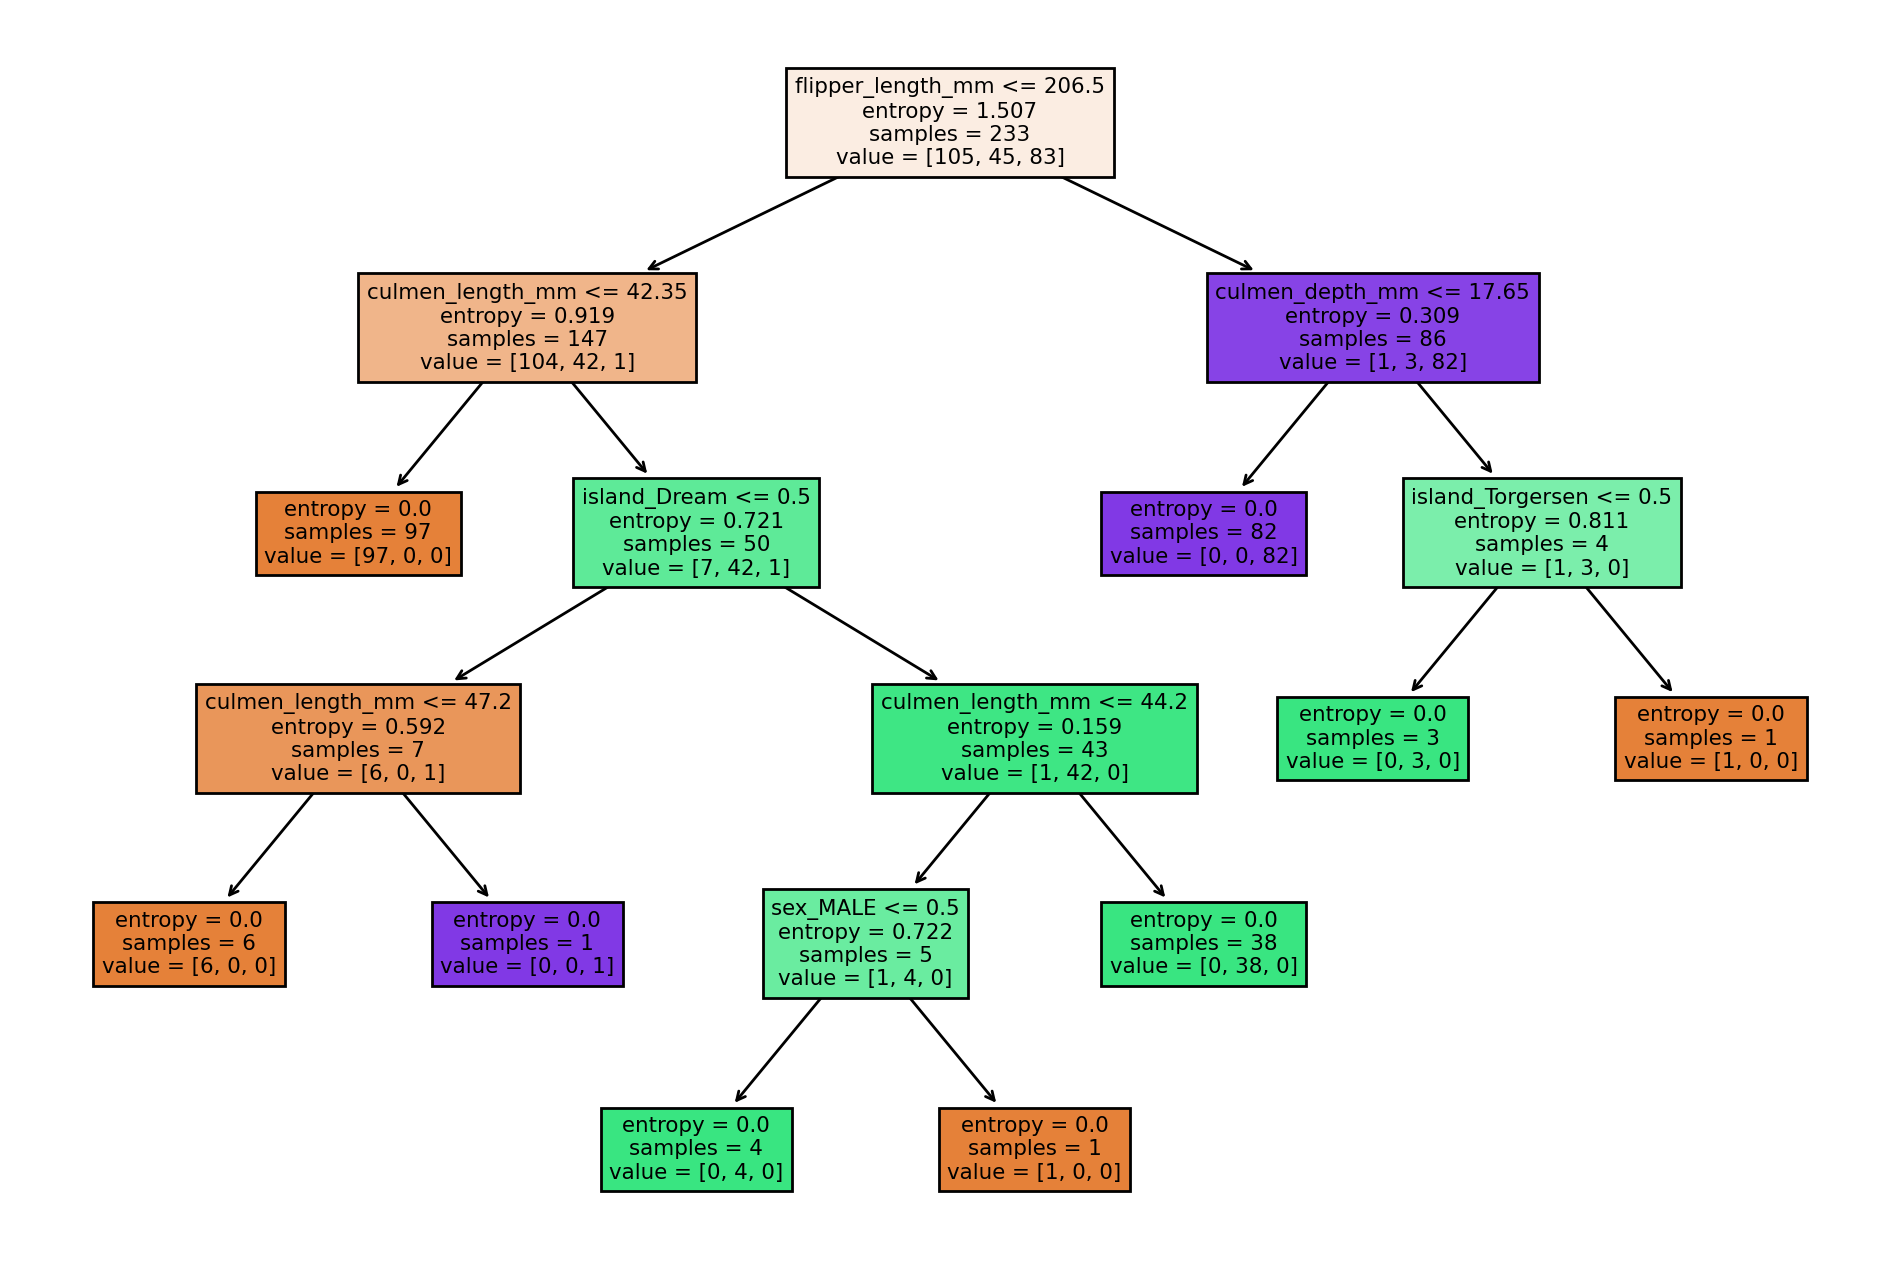

In [24]:
model_entropy_tree = DecisionTreeClassifier(criterion='entropy')
report_model(model_entropy_tree)

Typically you would use a Grid Search Cross Validation, however the default hyper parameters result in very good accuracy. Tuning the hyper parameters will not result in a signficantly better model for this data set. 